<a href="https://colab.research.google.com/github/aniketmondal1210/CodePlayground/blob/main/Logistic_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


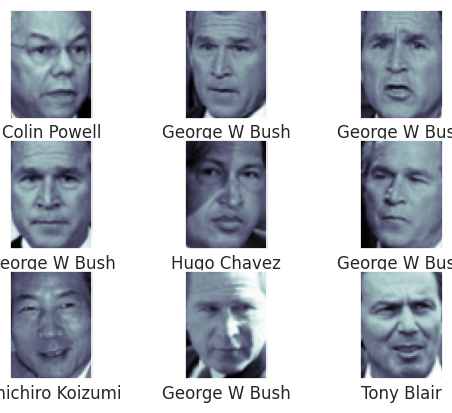

In [ ]:
# Lets plot few of them:
fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[],yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [ ]:
# Splitting the Training-Testing Data:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernal) and determine the best model

In [ ]:
model.fit(Xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
yfit = model.predict(Xtest)

In [ ]:
# Some test pattern with their prediction
fig = plt.figure(figsize=(4,5))
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

<Figure size 400x500 with 0 Axes>

In [ ]:
# Lets look on classification report:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))
mat = confusion_matrix(ytest, yfit)
print(mat)

                   precision    recall  f1-score   support

     Ariel Sharon       0.61      0.73      0.67        15
     Colin Powell       0.88      0.87      0.87        68
  Donald Rumsfeld       0.80      0.65      0.71        31
    George W Bush       0.85      0.87      0.86       126
Gerhard Schroeder       0.64      0.78      0.71        23
      Hugo Chavez       0.92      0.60      0.73        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.86      0.84        42

         accuracy                           0.82       337
        macro avg       0.80      0.79      0.79       337
     weighted avg       0.83      0.82      0.82       337

[[ 11   0   2   1   1   0   0   0]
 [  1  59   1   5   0   0   0   2]
 [  1   3  20   5   0   0   0   2]
 [  2   5   2 109   4   1   1   2]
 [  2   0   0   1  18   0   1   1]
 [  0   0   0   2   5  12   0   1]
 [  0   0   0   0   0   0  12   0]
 [  1   0   0   5   0   0   0  36]]
